In [163]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import os
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 100) # to display all the columns

In [164]:
print(os.listdir("../input"))

['Employee_Attrition.csv']


In [165]:
emp = pd.read_csv("../input/Employee_Attrition.csv")
print(emp.shape)
emp.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Data preprocessing

In [166]:
# check if there is any column with na values
emp.isnull().sum()[emp.isnull().sum() > 0]

Series([], dtype: int64)

In [167]:
# show number of unique values for each column
emp.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [168]:
# remove all the columns from dataset where unique value is 1, because that will be a constant for us.
del_col = emp.nunique()[emp.nunique()==1]
del_col

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [169]:
emp = emp.drop(labels=del_col.index,axis=1)

In [170]:
emp.nunique()[emp.nunique()==1]

Series([], dtype: int64)

In [171]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [172]:
# check for outliers in numeric coloumn
numeric_cols = emp.select_dtypes(include=['number'])
# Checking outliers at 25%,50%,75%,90%,95% and 99%
numeric_cols.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
90%,50.000000,1356.000000,23.000000,4.000000,1857.100000,4.000000,94.000000,3.000000,4.000000,4.000000,13775.600000,24001.700000,7.000000,21.000000,4.000000,4.000000,2.000000,23.000000,5.000000,4.000000,15.000000,9.000000,7.000000,9.000000
95%,54.000000,1424.100000,26.000000,4.000000,1967.550000,4.000000,97.000000,4.000000,4.000000,4.000000,17821.350000,25431.900000,8.000000,22.000000,4.000000,4.000000,3.000000,28.000000,5.000000,4.000000,20.000000,11.000000,9.000000,10.000000
99%,58.310000,1485.000000,29.000000,5.000000,2046.620000,4.000000,100.000000,4.000000,5.000000,4.000000,19626.310000,26704.240000,9.000000,25.000000,4.000000,4.000000,3.000000,35.000000,6.000000,4.000000,31.000000,15.000000,14.000000,14.000000


In [173]:
# there are no outliers in the data,

### Categorical to Continuos variables

In [174]:
# encode categorical variables with 2 unique value , map them to 0 & 1
emp['Attrition'] = emp['Attrition'].map({'No':0, 'Yes':1})
emp['Gender'] = emp['Gender'].map({'Female':0, 'Male':1})
emp['OverTime'] = emp['OverTime'].map({'No':0, 'Yes':1})

In [175]:
def add_dummy(df,colname):
    """
    This function will convert the categorical column to continuos by adding dummy variables to the dataframe and 
    drop the original categorical column.
    df      :: dataframe
    colname :: name of categorical column
    """
    df_new = df.copy()
    dummy = pd.get_dummies(df_new[colname],drop_first=True)
    df_new = pd.concat([df_new,dummy],axis=1)
    df_new.drop(labels=colname,axis=1,inplace=True)
    print(colname,':::',dummy.columns.values,'\n')
    del dummy
    return df_new

In [176]:
categorical_cols = emp.select_dtypes(include=['object'])
categorical_cols.nunique()

BusinessTravel    3
Department        3
EducationField    6
JobRole           9
MaritalStatus     3
dtype: int64

In [177]:
emp = add_dummy(emp,'BusinessTravel')
emp = add_dummy(emp,'Department')
emp = add_dummy(emp,'EducationField')
emp = add_dummy(emp,'JobRole')
emp = add_dummy(emp,'MaritalStatus')

BusinessTravel ::: ['Travel_Frequently' 'Travel_Rarely'] 

Department ::: ['Research & Development' 'Sales'] 

EducationField ::: ['Life Sciences' 'Marketing' 'Medical' 'Other' 'Technical Degree'] 

JobRole ::: ['Human Resources' 'Laboratory Technician' 'Manager'
 'Manufacturing Director' 'Research Director' 'Research Scientist'
 'Sales Executive' 'Sales Representative'] 

MaritalStatus ::: ['Married' 'Single'] 



In [178]:
emp.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
0,41,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


### Feature Scaling

In [179]:
# Normalising continuous features, we will normalize actual continuos columns(not the one which are converted from cat to con)
normalized_df=(numeric_cols-numeric_cols.mean())/numeric_cols.std()
normalized_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446199,0.742274,-1.010565,-0.891385,-1.700704,-0.660306,1.382668,0.379543,-0.057768,1.152861,-0.108313,0.725773,2.124413,-1.150163,-0.426085,-1.583639,-0.931697,-0.421499,-2.171243,-2.492972,-0.164557,-0.063274,-0.678915,0.245750
1,1.321915,-1.297333,-0.147100,-1.867790,-1.699043,0.254538,-0.240595,-1.025818,-0.057768,-0.660628,-0.291619,1.488370,-0.677819,2.128582,2.345353,1.191033,0.241906,-0.164455,0.155654,0.337981,0.488342,0.764737,-0.368590,0.806267
2,0.008340,1.413882,-0.887213,-0.891385,-1.695721,1.169383,1.284288,-1.025818,-0.961159,0.246116,-0.937335,-1.674271,1.323775,-0.057248,-0.426085,-0.658749,-0.931697,-0.550021,0.155654,0.337981,-1.143905,-1.167290,-0.678915,-1.155541
3,-0.429518,1.460969,-0.763861,1.061426,-1.694060,1.169383,-0.486544,0.379543,-0.961159,0.246116,-0.763374,1.242788,-0.677819,-1.150163,-0.426085,0.266142,-0.931697,-0.421499,0.155654,0.337981,0.161892,0.764737,0.252060,-1.155541
4,-1.086306,-0.524116,-0.887213,-1.867790,-1.690738,-1.575150,-1.273580,0.379543,-0.961159,-0.660628,-0.644639,0.325789,2.524732,-0.876934,-0.426085,1.191033,0.241906,-0.678543,0.155654,0.337981,-0.817456,-0.615282,-0.058265,-0.595025


In [180]:
emp = emp.drop(labels=numeric_cols.columns,axis=1)
emp = pd.concat([emp,normalized_df],axis=1)

In [181]:
emp.head()

,Attrition,Gender,OverTime,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.446199,0.742274,-1.010565,-0.891385,-1.700704,-0.660306,1.382668,0.379543,-0.057768,1.152861,-0.108313,0.725773,2.124413,-1.150163,-0.426085,-1.583639,-0.931697,-0.421499,-2.171243,-2.492972,-0.164557,-0.063274,-0.678915,0.245750
1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.321915,-1.297333,-0.147100,-1.867790,-1.699043,0.254538,-0.240595,-1.025818,-0.057768,-0.660628,-0.291619,1.488370,-0.677819,2.128582,2.345353,1.191033,0.241906,-0.164455,0.155654,0.337981,0.488342,0.764737,-0.368590,0.806267
2,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.008340,1.413882,-0.887213,-0.891385,-1.695721,1.169383,1.284288,-1.025818,-0.961159,0.246116,-0.937335,-1.674271,1.323775,-0.057248,-0.426085,-0.658749,-0.931697,-0.550021,0.155654,0.337981,-1.143905,-1.167290,-0.678915,-1.155541
3,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.429518,1.460969,-0.763861,1.061426,-1.694060,1.169383,-0.486544,0.379543,-0.961159,0.246116,-0.763374,1.242788,-0.677819,-1.150163,-0.426085,0.266142,-0.931697,-0.421499,0.155654,0.337981,0.161892,0.764737,0.252060,-1.155541
4,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,-1.086306,-0.524116,-0.887213,-1.867790,-1.690738,-1.575150,-1.273580,0.379543,-0.961159,-0.660628,-0.644639,0.325789,2.524732,-0.876934,-0.426085,1.191033,0.241906,-0.678543,0.155654,0.337981,-0.817456,-0.615282,-0.058265,-0.595025


### Attrition Rate

In [206]:
attirition = (sum(emp['Attrition'])/len(emp['Attrition'].index))*100
attirition

16.122448979591837

## Model Building

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# Putting feature variable to X
X = emp.iloc[:,1:]

# Putting response variable to y
y = emp.iloc[:,0]

In [185]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [186]:
import statsmodels.api as sm

#### Model 1

In [197]:
# Logistic regression model
model1 = sm.GLM(endog = y_train, exog=sm.add_constant(X_train)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1005
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                   0.10325635475
Method:                          IRLS   Log-Likelihood:                -279.75
Date:                Fri, 23 Mar 2018   Deviance:                       103.77
Time:                        18:19:04   Pearson chi2:                     104.
No. Iterations:                     2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0133      0.127      0.104      0.917      -0.236       0.263
OverTime                    0.2152      0.023      9.539      0.000       0.171       0.259
Travel_Frequently           0.1142      0.025      4.532      0.000       0.065       0.164
Research & Development      0.0629      0.127      0.494      0.621      -0.186       0.312
Sales                       0.0974      0.127      0.768      0.443      -0.151       0.346
Life Sciences              -0.0720      0.029     -2.517      0.012      -0.128      -0.016
Medical                    -0.0986      0.030     -3.315      0.001      -0.157      -0.040
Other                      -0.0838      0.050     -1.684      0.092      -0.181       0.014
Human Resources             0.1184      0.138      0.858      0.391      -0.152       0.389
Laboratory Technician       0.1109      0.030      3.713      0.000       0.052       0.169
Sales Representative        0.1413      0.049      2.860      0.004       0.044       0.238
Single                      0.0872      0.029      3.001      0.003       0.030       0.144
DistanceFromHome            0.0268      0.010      2.701      0.007       0.007       0.046
EnvironmentSatisfaction    -0.0409      0.010     -4.079      0.000      -0.061      -0.021
JobInvolvement             -0.0434      0.010     -4.336      0.000      -0.063      -0.024
JobLevel                   -0.0220      0.018     -1.248      0.212      -0.056       0.013
JobSatisfaction            -0.0339      0.010     -3.322      0.001      -0.054      -0.014
NumCompaniesWorked          0.0435      0.011      3.986      0.000       0.022       0.065
StockOptionLevel           -0.0228      0.013     -1.702      0.089      -0.049       0.003
TotalWorkingYears          -0.0485      0.019     -2.567      0.010      -0.085      -0.011
YearsAtCompany              0.0312      0.022      1.401      0.161      -0.012       0.075
YearsInCurrentRole         -0.0343      0.016     -2.096      0.036      -0.066      -0.002
YearsSinceLastPromotion     0.0493      0.013      3.756      0.000       0.024       0.075
YearsWithCurrManager       -0.0390      0.017     -2.354      0.019      -0.071      -0.007
===========================================================================================
"""

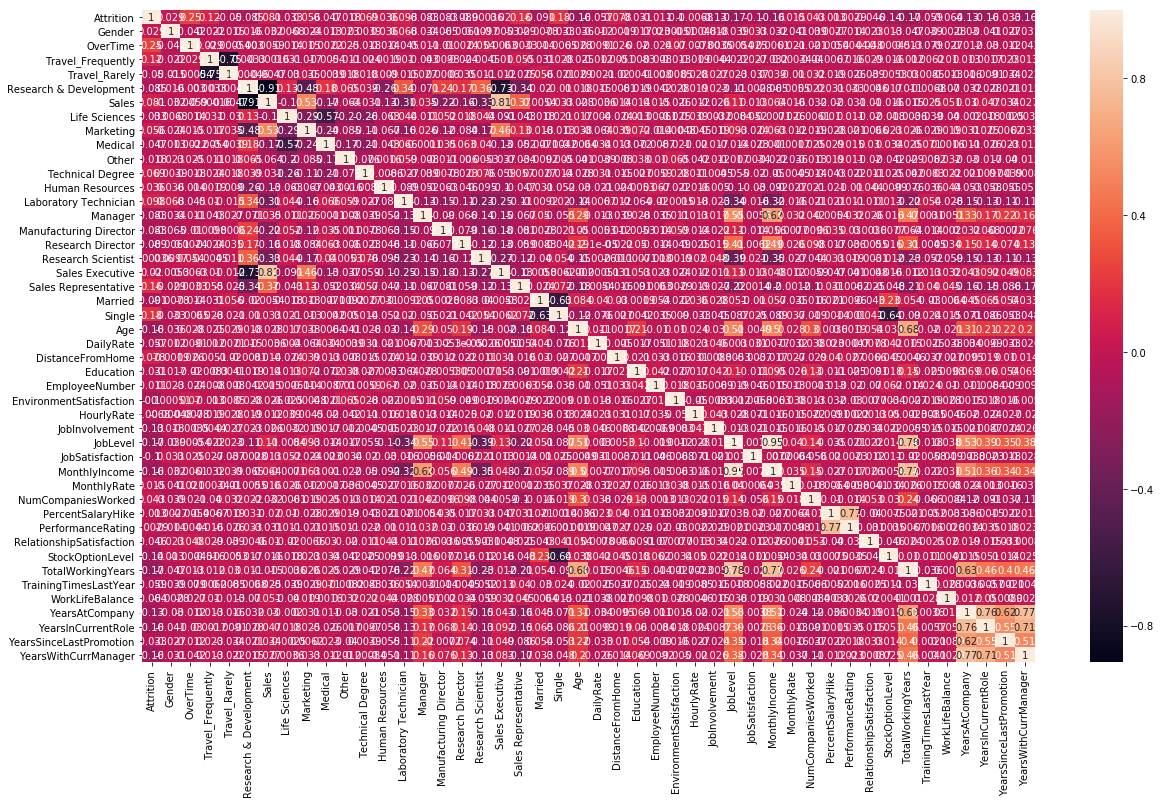

In [188]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,12))        # Size of the figure
corr = emp.corr()
sns.heatmap(corr,annot = True)
plt.show()

### Feature Selection Using RFE

In [189]:
print('No of columns : ',emp.shape[1])
print('Select top 50% features')

No of columns :  46
Select top 50% features


In [190]:
#rank all features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
rfe = RFE(logistic, n_features_to_select=emp.shape[1]/2)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_train.columns)))
print(feature_ranking)

Features sorted by their rank::::

[(1, 'DistanceFromHome'), (1, 'EnvironmentSatisfaction'), (1, 'Human Resources'), (1, 'JobInvolvement'), (1, 'JobLevel'), (1, 'JobSatisfaction'), (1, 'Laboratory Technician'), (1, 'Life Sciences'), (1, 'Medical'), (1, 'NumCompaniesWorked'), (1, 'Other'), (1, 'OverTime'), (1, 'Research & Development'), (1, 'Sales'), (1, 'Sales Representative'), (1, 'Single'), (1, 'StockOptionLevel'), (1, 'TotalWorkingYears'), (1, 'Travel_Frequently'), (1, 'YearsAtCompany'), (1, 'YearsInCurrentRole'), (1, 'YearsSinceLastPromotion'), (1, 'YearsWithCurrManager'), (2, 'Gender'), (3, 'RelationshipSatisfaction'), (4, 'Marketing'), (5, 'WorkLifeBalance'), (6, 'Age'), (7, 'Travel_Rarely'), (8, 'MonthlyIncome'), (9, 'Manufacturing Director'), (10, 'Research Director'), (11, 'EmployeeNumber'), (12, 'TrainingTimesLastYear'), (13, 'Technical Degree'), (14, 'Manager'), (15, 'DailyRate'), (16, 'Married'), (17, 'Sales Executive'), (18, 'Research Scientist'), (19, 'HourlyRate'), (20, 

In [191]:
top_features = X_train.columns[rfe.support_]
X_train = X_train[top_features]
vif_data = emp[top_features]
X_test = X_test[top_features]
print('No. of Features after RFE: ',X_train.shape[1])
X_train.head()

No. of Features after RFE:  23


,OverTime,Travel_Frequently,Research & Development,Sales,Life Sciences,Medical,Other,Human Resources,Laboratory Technician,Sales Representative,Single,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
178,0,0,0,1,0,0,0,0,0,0,0,-1.010565,-0.660306,0.379543,0.845624,-1.567373,-0.677819,2.589113,1.634850,2.773487,2.420761,3.975957,0.806267
971,0,0,1,0,0,0,0,0,0,0,1,0.222957,1.169383,-1.025818,1.749015,-0.660628,0.122819,-0.931697,2.277459,-0.327782,-0.615282,-0.678915,-0.314766
1172,0,0,0,1,0,1,0,0,0,0,1,0.099605,0.254538,-1.025818,-0.057768,0.246116,2.524732,-0.931697,-0.421499,-0.327782,-0.615282,-0.368590,-0.034508
667,1,0,1,0,1,0,0,0,1,0,0,-0.887213,-0.660306,-2.431178,-0.961159,1.152861,0.523138,0.241906,-0.164455,-0.001332,0.764737,-0.368590,-1.155541
399,0,0,1,0,1,0,0,0,1,0,0,-1.010565,1.169383,-1.025818,-0.961159,-1.567373,-0.677819,0.241906,-0.935586,-0.491006,-0.615282,0.252060,-0.595025


In [160]:
def vif_cal(vif_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=vif_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [199]:
def feature_to_drop(model,SF=0.05,VF=2):
    """
    model :: name of the model.
    SF    :: Significance Level, default is 0.05
    VF    :: VIF value, default is 2
    
    """
    pvalue = model.pvalues[model.pvalues >= SF] # SF Value condition
    pvalue = pd.DataFrame(pvalue,columns=['pvalue']).sort_values(by='pvalue',ascending=False)
    if len(pvalue >0):
        if pvalue.index[0] == 'const':
            pvalue = pvalue.drop(pvalue.head(1).index)
    vif = vif_cal(vif_data).set_index('Var')
    matrix =pd.concat([pvalue,vif[vif.index.isin(pvalue.index)]['Vif']],axis=1)
    matrix = matrix[(matrix.Vif >=VF)] # VF value condition
    matrix = matrix.sort_values(by='pvalue',ascending=False)
    if(len(matrix)>0):
        feature = matrix[0:1]
        return feature
    else:
        return 'No feature to drop'

In [202]:
# Create new dataframe model_summary that will contain important information for each model.
model_summary = pd.DataFrame(columns=['Model','No_Features','R-squared','Adj_R-squared','Column_to_Drop','p-value','VIF'])
model_summary = model_summary.set_index('Model')

In [201]:
def add_model_summary(model,name):
    col = feature_to_drop(model)
    if str(type(col)).find('str') == -1:
        model_summary.loc[name] = [X_train.shape[1]-1,model.rsquared,model.rsquared_adj,col.index[0],col.pvalue[0],col.Vif[0]]
    else:
        model_summary.loc[name] = [X_train.shape[1]-1,model.rsquared,model.rsquared_adj,'Nothing to Drop',np.NaN,np.NaN]

#### Model 2

In [200]:
feature_to_drop(model1,SF=0.05,VF=2)

,pvalue,Vif
JobLevel,0.211946,3.05


In [203]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model1).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model1).index[0], axis =1)

In [204]:
model2 = sm.GLM(y_train, sm.add_constant(X_train)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1006
Model Family:                Gaussian   Df Model:                           22
Link Function:               identity   Scale:                  0.103313637112
Method:                          IRLS   Log-Likelihood:                -280.55
Date:                Fri, 23 Mar 2018   Deviance:                       103.93
Time:                        18:23:57   Pearson chi2:                     104.
No. Iterations:                     2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0073      0.126     -0.057      0.954      -0.255       0.240
OverTime                    0.2170      0.023      9.636      0.000       0.173       0.261
Travel_Frequently           0.1150      0.025      4.563      0.000       0.066       0.164
Research & Development      0.0822      0.126      0.651      0.515      -0.165       0.330
Sales                       0.1112      0.126      0.879      0.380      -0.137       0.359
Life Sciences              -0.0734      0.029     -2.570      0.010      -0.129      -0.017
Medical                    -0.0994      0.030     -3.343      0.001      -0.158      -0.041
Other                      -0.0864      0.050     -1.738      0.082      -0.184       0.011
Human Resources             0.1447      0.136      1.060      0.289      -0.123       0.412
Laboratory Technician       0.1218      0.029      4.261      0.000       0.066       0.178
Sales Representative        0.1542      0.048      3.189      0.001       0.059       0.249
Single                      0.0893      0.029      3.076      0.002       0.032       0.146
DistanceFromHome            0.0270      0.010      2.725      0.006       0.008       0.046
EnvironmentSatisfaction    -0.0407      0.010     -4.062      0.000      -0.060      -0.021
JobInvolvement             -0.0432      0.010     -4.315      0.000      -0.063      -0.024
JobSatisfaction            -0.0346      0.010     -3.394      0.001      -0.055      -0.015
NumCompaniesWorked          0.0442      0.011      4.053      0.000       0.023       0.066
StockOptionLevel           -0.0221      0.013     -1.649      0.099      -0.048       0.004
TotalWorkingYears          -0.0636      0.014     -4.394      0.000      -0.092      -0.035
YearsAtCompany              0.0303      0.022      1.362      0.173      -0.013       0.074
YearsInCurrentRole         -0.0339      0.016     -2.072      0.038      -0.066      -0.002
YearsSinceLastPromotion     0.0481      0.013      3.676      0.000       0.022       0.074
YearsWithCurrManager       -0.0381      0.017     -2.301      0.021      -0.071      -0.006
===========================================================================================
"""

In [205]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,18,21,19,17,16,20,0,6,9,5,15,2,10,7,12,13,14,11,3,4,1,8
Var,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,TotalWorkingYears,StockOptionLevel,YearsSinceLastPromotion,OverTime,Other,Sales Representative,Medical,NumCompaniesWorked,Research & Development,Single,Human Resources,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,DistanceFromHome,Sales,Life Sciences,Travel_Frequently,Laboratory Technician
Vif,4.53,2.77,2.7,2.09,1.71,1.67,1.41,1.34,1.33,1.28,1.24,1.17,1.15,1.1,1.01,1.01,1.01,1.01,0.99,0.51,0.09,0.02


In [207]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model2, SF=0.05, VF=2)
drop

,pvalue,Vif
YearsAtCompany,0.173052,4.53


In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model2, name = 'model2')